# Step 1: Data Collection

In [1]:
#Importing the necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pf
import plotly.express as px
import plotly as py

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing our Dataset
Dataset = pd.read_csv('diabetes.csv') #assigning the Dataset vasiable to our csv file.

## Data Preview

In [3]:
## Preview Data
Dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# Data dimensions (rows, columns)
Dataset.shape
#type(Dataset)

(768, 9)

In [5]:
Dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
#Features' data type

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Statistical Summary
Dataset.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [8]:
# Count of null values
Dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Step 2: DATA VISUALISATION

<AxesSubplot:xlabel='Outcome', ylabel='count'>

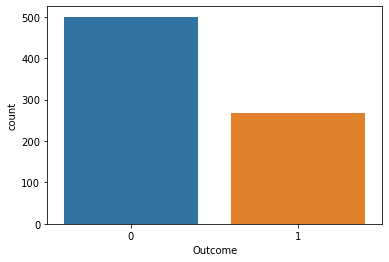

In [9]:
# Countplot  It shows data Inbalance.
sns.countplot(x='Outcome', data = Dataset)

### Observations 

The CountPlot shows that our dataset is imbalanced as the number of those with the disease is less than those without it.
From the heatmap, there is high correlation btn the Outcome and the Glucose, Age, BMI and Insulin features.

# Obtaining the relation of Various Features. 

# Correlation Matrices.

In [10]:
fig0 = px.imshow(Dataset.corr(),text_auto=True)  
fig0.update_layout(
    width=1000,
    height=1000,
)

# Conclusion..

Close to 1 indicates a very good relationship

Close to -1 indicates a very poor relationship

From the above graph, we can see that the relationship is very strong for the below features

Age-Pregnancies
SkinThickness-BMI
Glucose-Insulin
In addition to what we have observed in Pair plot analysis, we also found a strong relationship between age and pregnancy. Let us take all the 6 features and try to analyze them individually using Univariate analysis.

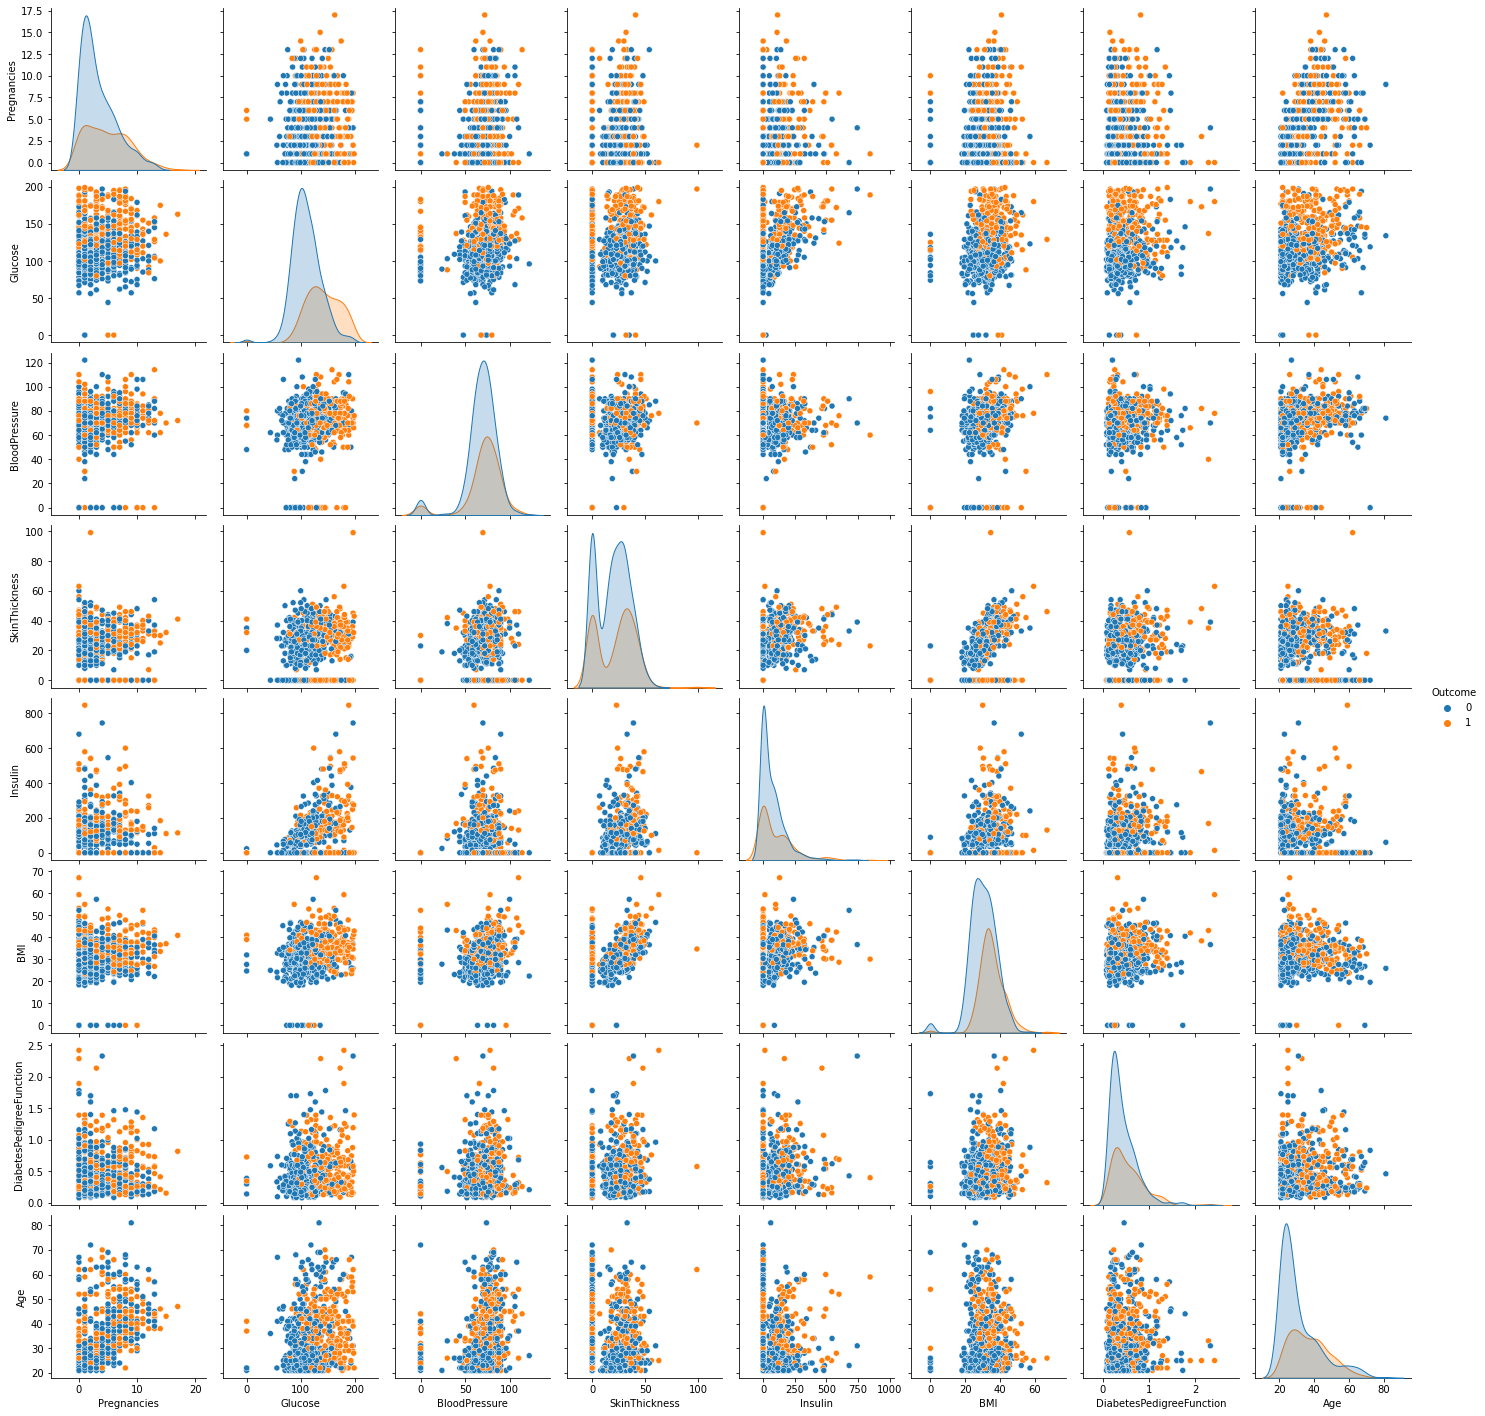

In [11]:
#Piarplot
# sns.pairplot(data = Dataset, hue = "Outcome")
# plt.show()

columns = list(Dataset.columns.values)
features = [x for x in columns if x != 'Outcome']
sns.pairplot(Dataset, hue='Outcome', 
             x_vars=features, y_vars=features, height=2.5)
plt.show()

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', 

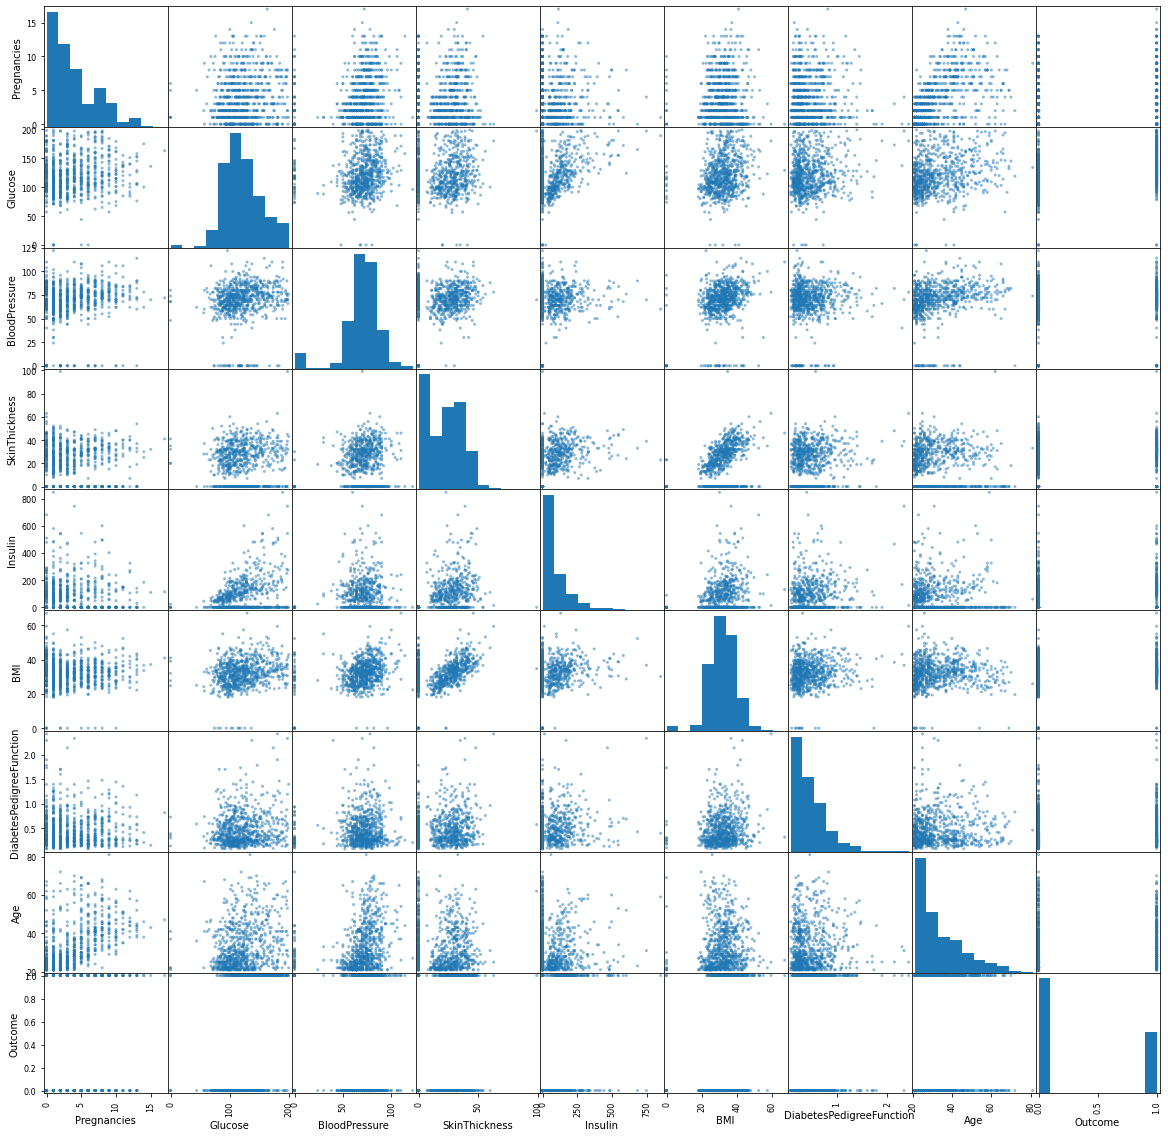

In [12]:
# Scatter plot matrix 

#from pd.tools.plotting import scatter_matrix
#scatter_matrix(Dataset, figsize = (20, 20))


pd.plotting.scatter_matrix(Dataset, figsize = (20, 20))

In [13]:
fig = px.scatter_matrix(data_frame=Dataset,color=Dataset['Outcome'])
fig.update_layout(
    width=1500,
    height=1500,
    paper_bgcolor="LightSteelBlue",
)

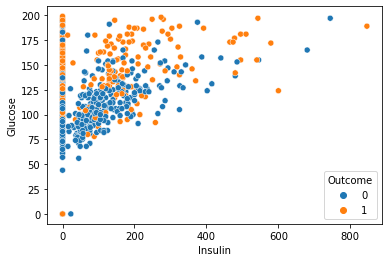

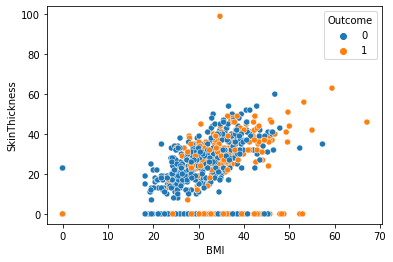

In [14]:
# A scatter plot using Insulin and Glucose, then BMI and the skinthickness
sns.scatterplot(data = Dataset , x='Insulin', y = 'Glucose', hue = 'Outcome')
plt.show()

sns.scatterplot(data = Dataset , x='BMI', y = 'SkinThickness', hue = 'Outcome')
plt.show()

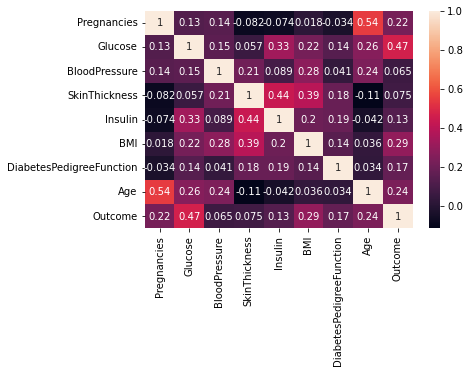

In [15]:
#Spearman's Rank Coorelation Coeffient
#This is a heatmap!
sns.heatmap(Dataset.corr(), annot= True)
plt.show()

# Conclusion..
Close to 1 indicates a very good relationship

Close to -1 indicates a very poor relationship

From the above graph, we can see that the relationship is very strong for the below features

Age-Pregnancies
SkinThickness-BMI
Glucose-Insulin
In addition to what we have observed in Pair plot analysis, we also found a strong relationship between age and pregnancy. Let us take all the 6 features and try to analyze them individually using Univariate analysis.

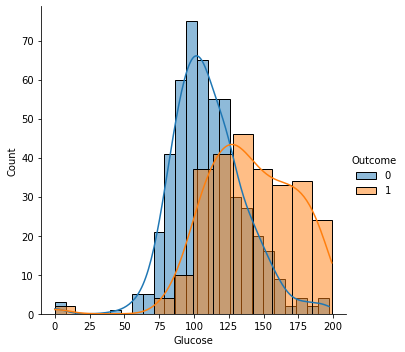

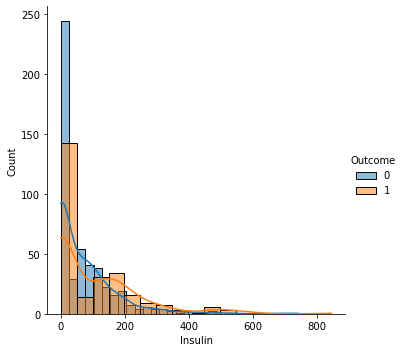

In [16]:
#Density Plot or Distribution Plot
#A simple density plot to understand how Glucose and Insulin are affecting the outcomes. We can see there is a lot of overlap.

sns.FacetGrid(Dataset, hue='Outcome', height = 5).map(sns.histplot, 'Glucose', kde=True).add_legend()
plt.show()
sns.FacetGrid(Dataset, hue='Outcome', height = 5).map(sns.histplot, 'Insulin', kde=True).add_legend()
plt.show()


# Box Plots.

In [17]:
px.box(data_frame=Dataset,color=Dataset['Outcome'])

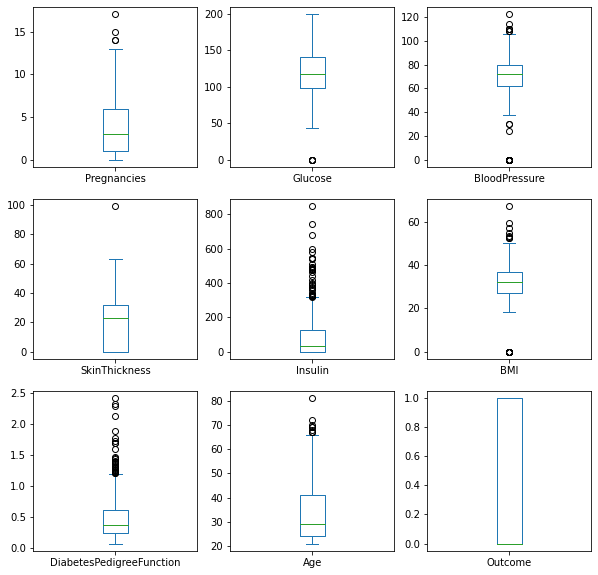

In [18]:
# BOX PLOTS OF ALL THE FEATURES 
Dataset.plot(kind='box',subplots=True ,layout=(3,3),sharex=False , sharey=False , figsize =(10,10))
plt.show()

# Let’s analyze each category independently for minute analysis

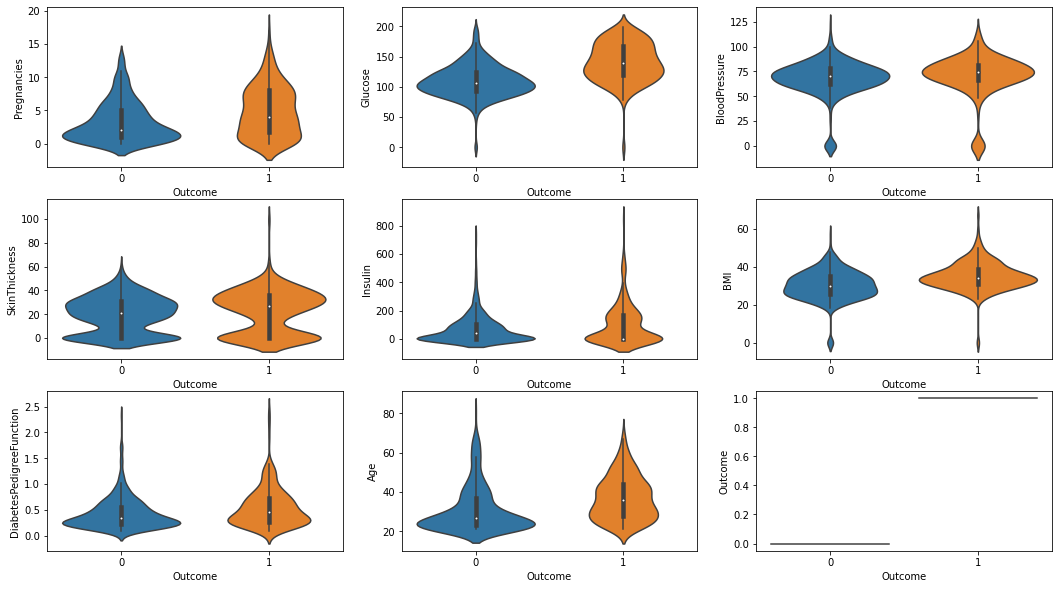

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
cnt = 0
for i in range(3):
    for j in range(3):
        sns.violinplot(ax=axes[i,j],data=Dataset,x=Dataset.columns[-1],y=Dataset.columns[cnt])
        cnt+=1

# conclusions

For pregenacis, if they have 5 or more times then chances of diabetes are more
For Glucose, if glucose level is 120 or more then chances of diabetes are more
For Blood Pressure, the diabetic patient have more bloodpressure as compared to non-diabetic patient
For Skin thickness, the diabetic patient have either more skin thickness or less as compared to non-diabetic patient
For Insulin, the non-diabetic patient have little higher insulin value
For BMI, the BMI value for diabetic patient is little higher leading to type II diabetis
For Diabetis Pedigree, Diabetics seem to have a higher pedigree function that the non-diabetics.

# Illustration of the Patterns of Interest.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

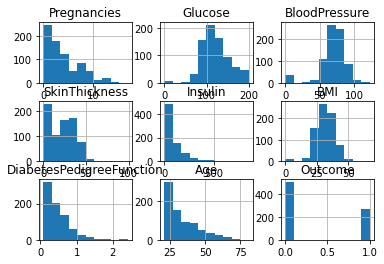

In [20]:
# Draw histograms for all attributes 
Dataset.hist()


In [21]:
age_df = Dataset['Age'][Dataset['Outcome']]
age_df = Dataset[Dataset['Outcome'].astype('bool')]
len(range(0,age_df.shape[0]))
age_df[['Age','Outcome']].value_counts()
age_label = pd.cut(x=age_df['Age'],bins=4,labels=["Between 21 to 34","Between 34 to 45","Between 45 to 57","Between 57 to 70"])
age_df['age_label'] = age_label
age_analysis = age_df[['Outcome','age_label']].groupby('age_label').count()
#import numpy as np
t = ((age_analysis*100)/age_analysis.sum()).reset_index()
px.pie(data_frame=t,names=t['age_label'],values=t['Outcome'])
t = (age_df.groupby('age_label').mean()).reset_index()
t

age_label  Pregnancies     Glucose  BloodPressure  SkinThickness  \
0  Between 21 to 34     2.729508  139.221311      65.254098      23.934426   
1  Between 34 to 45     6.715909  139.568182      72.909091      19.897727   
2  Between 45 to 57     7.136364  144.204545      79.181818      22.500000   
3  Between 57 to 70     4.714286  160.357143      80.000000      19.928571   

      Insulin        BMI  DiabetesPedigreeFunction        Age  Outcome  
0  106.401639  35.972131                  0.617877  27.311475      1.0  
1   71.818182  35.693182                  0.464420  39.886364      1.0  
2  121.318182  32.825000                  0.561932  50.590909      1.0  
3  160.785714  31.735714                  0.468500  61.857143      1.0

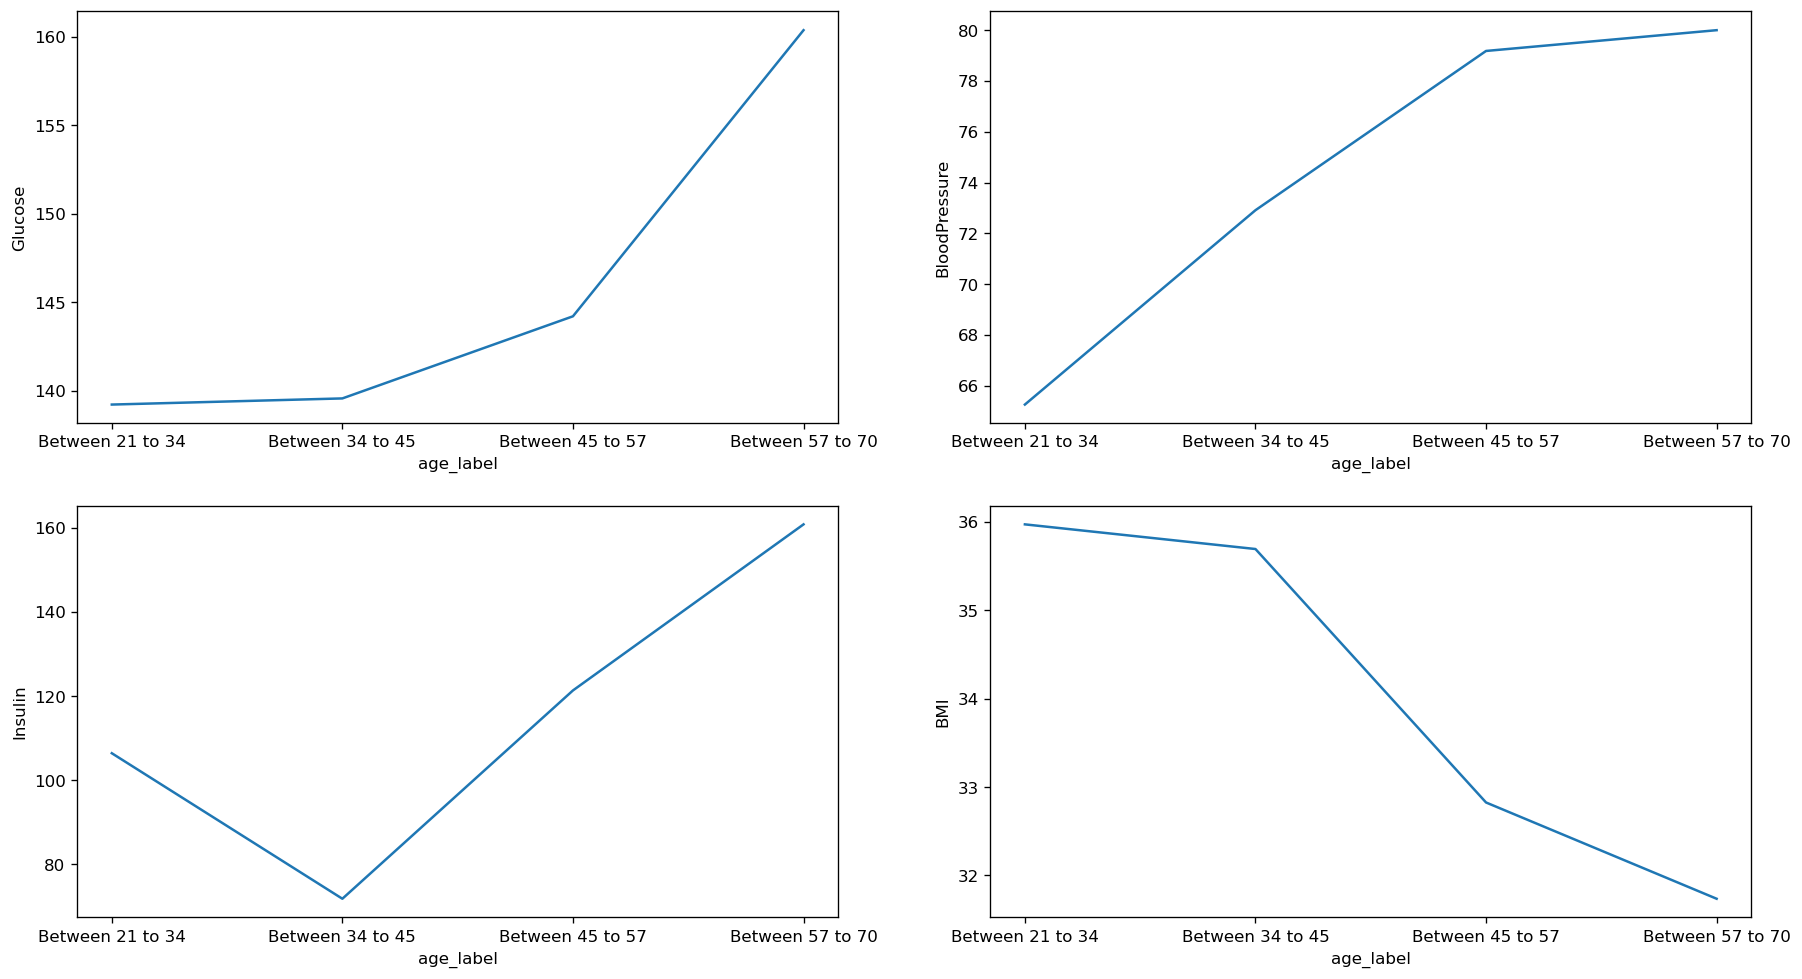

In [22]:
from matplotlib import rcParams
# figure size in inches
plt.rcParams["figure.dpi"] = 120
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.lineplot(ax=axes[0,0],x='age_label',y='Glucose',data=t )
sns.lineplot(ax=axes[0,1],x='age_label',y='BloodPressure',data=t)
sns.lineplot(ax=axes[1,0],x='age_label',y='Insulin',data=t)
sns.lineplot(ax=axes[1,1],x='age_label',y='BMI',data=t)
plt.show()

# Here one can clearly observe that: (from the above cell)

As the age of diabetic patient is more the glucose level is also more. Indicating diabetes increase with the age.
The blood pressure of diabetic patient will be more as age increase
Level of insulin for age of 34–45 is lower whereas as the age increase insulin will be high
As the age is more the BMI index is getting lower

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.05922
Time:                        21:00:35   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072

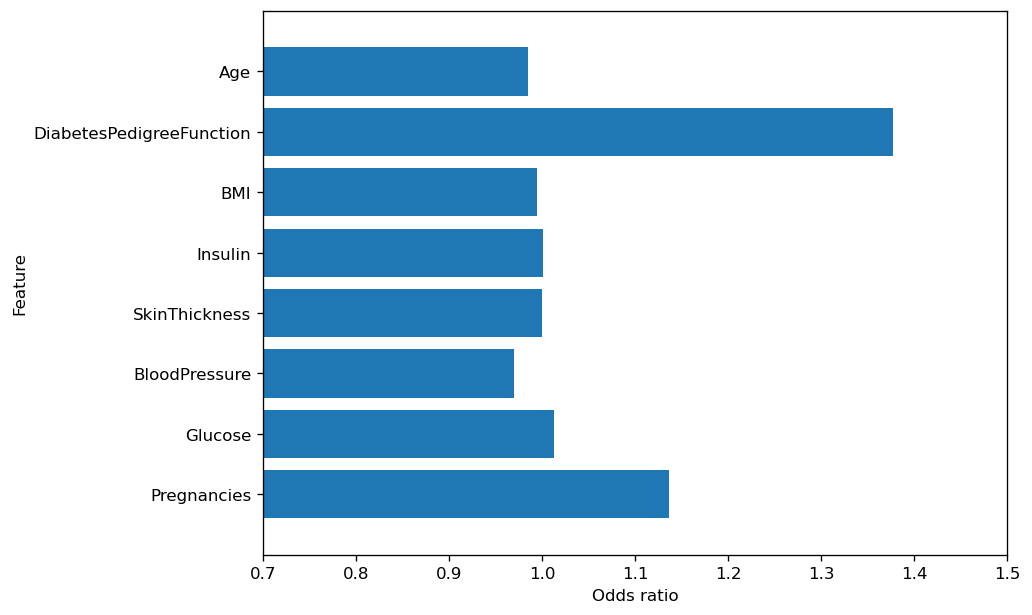

FROM THE GRAPHS BELOW, WE SEE THAT GLUCOSE, BMI AND AGE ARE MORE CONSIDERED COMPARED TO OTHER FEATURES OF THE DATASET.
 It suggests that glucose and BMI are important predictors of diabetes 
Random Forest - Max Depth = 3
Accuracy on training set: 0.788
Random Forest Feature Importance
Accuracy on training set: 0.837


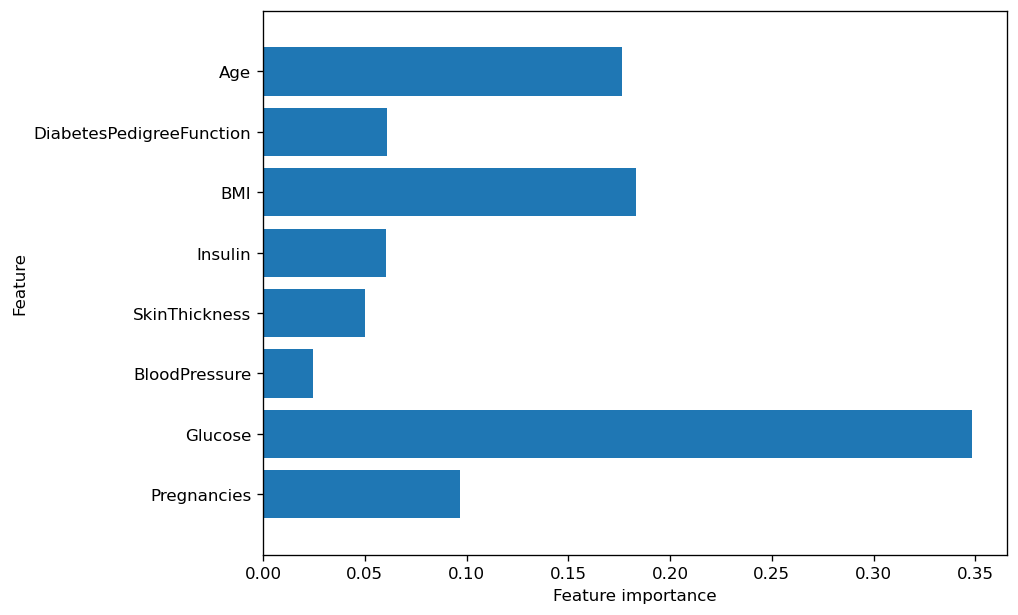

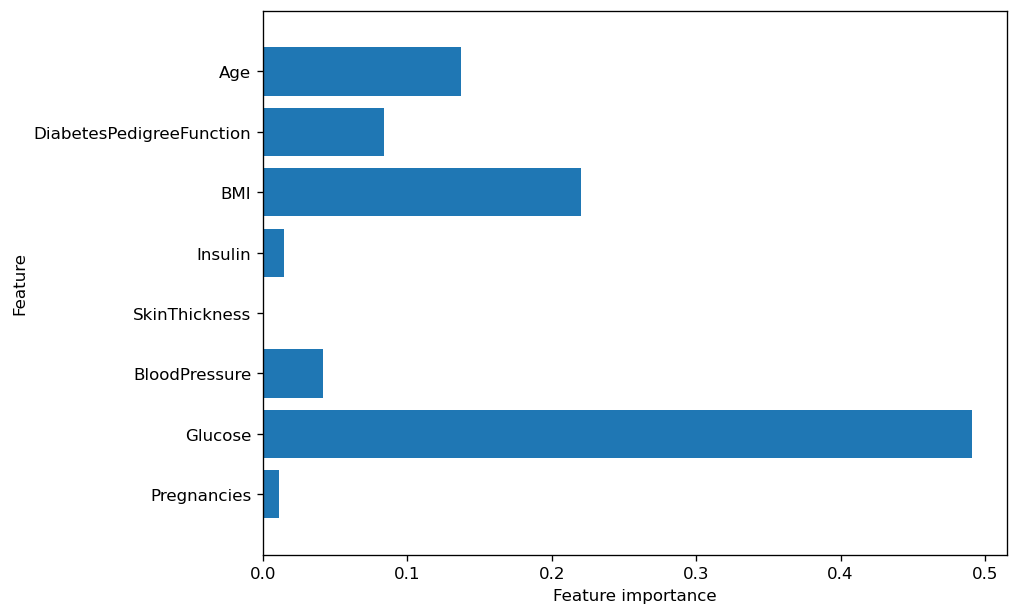

In [23]:
import statsmodels.api as sm
logit = sm.Logit(Dataset ['Outcome'], Dataset [features]) 
result = logit.fit()
# Scipy error fixing..
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result.summary())
print("Odds ratio")
print(np.exp(result.params))

oddsratio = np.exp(result.params)
plt.figure(figsize=(8,6))
n_features = 8
plt.barh(range(n_features), oddsratio, align='center')
plt.yticks(np.arange(n_features), features)
plt.xlabel("Odds ratio")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.xlim(0.7, 1.5)
plt.show()

#Feature Importance based on different algorithms.

print('FROM THE GRAPHS BELOW, WE SEE THAT GLUCOSE, BMI AND AGE ARE MORE CONSIDERED COMPARED TO OTHER FEATURES OF THE DATASET.\n It suggests that glucose and BMI are important predictors of diabetes ')
diabetes_features = [x for i,x in enumerate(Dataset.columns) if i !=8]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)



#Basing on Random Forest Classifier.

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf.fit(Dataset[features], Dataset['Outcome'])
print('Random Forest - Max Depth = 3')
print("Accuracy on training set: {:.3f}".format(rf.score(Dataset[features], Dataset['Outcome'])))
print('Random Forest Feature Importance')
plot_feature_importances_diabetes(rf)


#Basing on DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(Dataset[features], Dataset['Outcome'])
print("Accuracy on training set: {:.3f}".format(tree.score(Dataset[features], Dataset['Outcome'])))
plot_feature_importances_diabetes(tree)




# Step 3 Data Processing 

In [24]:
#Intialising a new dataset.
dataset_new = Dataset

In [25]:
### 
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [26]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [28]:
# Statistical summary
dataset_new.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184  12.096346  24.000   64.00000   
SkinThickness             768.0   29.153420   8.790942   7.000   25.00000   
Insulin                   768.0  155.548223  85.021108  14.000  121.50000   
BMI                       768.0   32.457464   6.875151  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%         75%     max  
Pregnancies                 3.000000    6.000000   17.00  
Glucose                   117.000000  140.250000  199.00  
BloodPressure              72.202592   80.000000  122.00  
SkinThickness              29.153420   32.000000   99.00  
Insulin                   155.548223  155.548223  846.00  
BMI                        32.400000   36.600000   67.10  
DiabetesPedigreeFunction    0.372500    0.626250    2.42  
Age                        29.000000   41.000000   81.00  
Outcome                     0.000000    1.000000    1.00

In [29]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [30]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [31]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [32]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [33]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


#  Step 4 Data Modelling

In [34]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = Dataset.loc[:,Dataset.columns!="Outcome"]
y = Dataset.loc[:,'Outcome']
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 10
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7669514695830485


In [35]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

X = Dataset.loc[:,Dataset.columns!="Outcome"]
y = Dataset.loc[:,'Outcome']
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7734278879015721


In [36]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

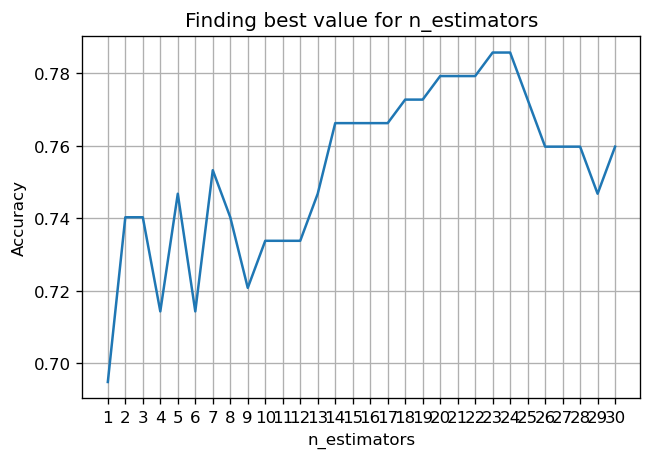

Highest value:  0.7857142857142857


In [37]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [38]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [39]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [40]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [41]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [42]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [43]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5 Model Evaluation

In [44]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [45]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143
Decision tree: 68.18181818181817
Random Forest: 75.97402597402598


In [46]:
#From the above comparison, we can observe that K Nearest neighbors gets the highest accuracy of 78.57 %

In [47]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[87, 13],
       [20, 34]], dtype=int64)

<AxesSubplot:>

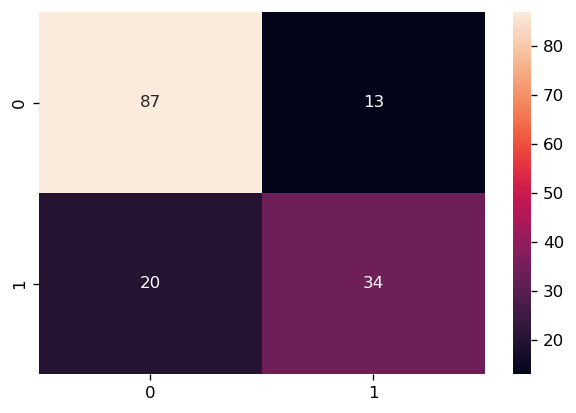

In [48]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [49]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

